# Group 47
## Jerry Li, Jingxian Liu
### April 23, 2023


#### Introduction  

Our project is to identify the best neighborhood in Pittsburgh. Using data from the Western Pennsylvania Regional Data Center (WPRDC), we create a data-driven argument to support our claim about the best neighborhood. Four metrics we selected to evaluate neighborhoods are Pittsburgh police arrest data (safety), education attainment (school quality), supermarket convenience (access to healthy food), and race (diversity). By analyzing these factors, we aim to identify the neighborhood that offers the best quality of life for its residents. We explored a few alternative metrics that could be used to evaluate neighborhoods, including income, transit systems, and entertainment venues. But we ultimately decided to focus on the four metrics mentioned above, as we felt they were most closely related to the quality of life of residents in a neighborhood.


#### Metric
* Arrest data: We used arrest data as a proxy for safety, with the assumption that neighborhoods with lower arrest rates are generally safer than those with higher arrest rates.  

* Education attainment: The education attainment data can be regarded as a proxy for the quality of the school system, with the assumption that neighborhoods with higher education attainment rates have better schools than those with lower rates.    

* Race: The race data can be used to evaluate neighborhood diversity, with the assumption that neighborhoods with a higher percentage of residents from different racial and ethnic backgrounds are generally more diverse and culturally rich.

#### The Best Neighborhood

* Safety Issue


In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arrest_data = pd.read_csv ("police arrest data.csv")
arrest_data.head()
# dataframe1 = pd.arrest_data(df, columns = ['INCIDENTNEIGHBORHOOD'])
safety_ranking = arrest_data ['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending = True)
top10_safety = safety_ranking.iloc[:50]
print (top10_safety)



Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Regent Square                   35
Ridgemont                       35
New Homestead                   39
Chartiers City                  40
Swisshelm Park                  40
East Carnegie                   48
St. Clair                       48
Outside County                  52
Outside State                   60
Summer Hill                     66
Oakwood                         79
Golden Triangle/Civic Arena     83
Hays                           106
Fairywood                      112
Mount Oliver                   113
Windgap                        115
Allegheny West                 122
Arlington Heights              139
Polish Hill                    151
Glen Hazel                     153
Friendship                     157
Upper Lawrenceville            174
Morningside                    180
Duquesne Heights               181
Esplen              

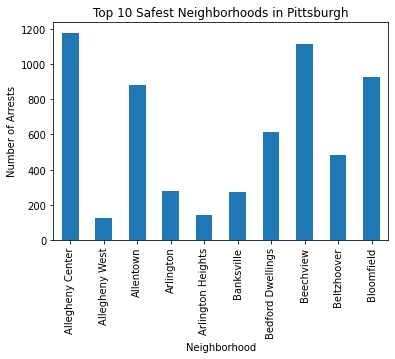

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Read in the Pittsburgh police arrest data from the CSV file
arrest_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

# Display the first few rows of the DataFrame
arrest_data.head()

# Use value_counts() method to count the number of occurrences of each neighborhood and sort the resulting Series in ascending order by index
safety_ranking = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().sort_index(ascending=True)

# Get the top 10 safest neighborhoods based on the number of arrests
top10_safety = safety_ranking.iloc[:10]

# Plot a bar chart of the top 10 safest neighborhoods
top10_safety.plot(kind='bar', title='Top 10 Safest Neighborhoods in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.show()

In [1]:
import pandas as pd

# Read in the three datasets
arrests = pd.read_csv("https://data.wprdc.org/dataset/arrest-data/resource/7ddbfcf0-8d7e-4c30-9d2d-c70b24285b29")
education = pd.read_csv("https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/033b72af-7990-45dd-a590-b0c57a657db3")
race = pd.read_csv("https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/12535b2e-6180-4cdf-b7d8-ec5294259e49")

# Group the arrests data by neighborhood and count the number of arrests in each neighborhood
arrest_counts = arrests.groupby("INCIDENTNEIGHBORHOOD").size().reset_index(name="arrest_count")

# Merge the education and race data by neighborhood
edu_race = pd.merge(education, race, on="Neighborhood")

# Merge the arrests data with the education/race data by neighborhood
merged = pd.merge(arrest_counts, edu_race, left_on="INCIDENTNEIGHBORHOOD", right_on="Neighborhood")

# Define the criteria for the "best" neighborhood
low_crime = merged.sort_values(by="arrest_count").reset_index(drop=True)["INCIDENTNEIGHBORHOOD"].iloc[0]
high_education = merged.sort_values(by="PCTHS18_24", ascending=False).reset_index(drop=True)["Neighborhood"].iloc[0]
high_diversity = merged.sort_values(by="PCTNONWHITE", ascending=False).reset_index(drop=True)["Neighborhood"].iloc[0]

# Print the best neighborhood based on each criterion
print(f"Best neighborhood for low crime: {low_crime}")
print(f"Best neighborhood for high education: {high_education}")
print(f"Best neighborhood for high diversity: {high_diversity}")

HTTPError: HTTP Error 404: Not Found